In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [17]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [19]:
# Filtering by season
df = df[df["Season"]=="Summer"]

df.shape

(222552, 15)

In [20]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [21]:
df = df.merge(region_df, on="NOC", how="left")

In [22]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


## Explore

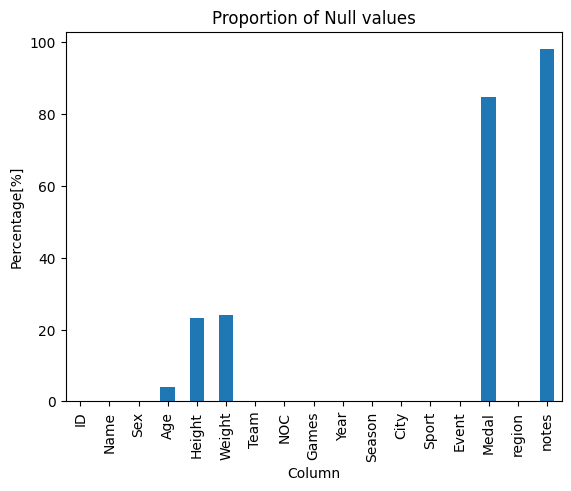

In [23]:
(df.isnull().sum()/len(df)*100).plot(kind="bar", xlabel="Column", ylabel="Percentage[%]", title="Proportion of Null values");

In [24]:
df.duplicated().sum()

np.int64(1385)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df = pd.concat([df, pd.get_dummies(df["Medal"], dtype=int)], axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


### Medal Tally

In [27]:
df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values(by="Gold", ascending=False)

,Gold,Silver,Bronze
region,,,
USA,2472,1333,1197
Russia,1220,974,994
Germany,1075,987,1064
UK,635,729,620
Italy,518,474,454
...,...,...,...
Vanuatu,0,0,0
"Virgin Islands, British",0,0,0
"Virgin Islands, US",0,1,0


In [28]:
medal_tally = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [29]:
medal_tally = medal_tally.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values(by="Gold", ascending=False).reset_index()

In [30]:
medal_tally.head()

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287


In [31]:
medal_tally[medal_tally["region"] == "India"]

,region,Gold,Silver,Bronze
47,India,9,7,12


In [32]:
medal_tally["Total"] = (medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"])
medal_tally.head()

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777


In [84]:
medal_tally["Total"].dropna(axis=0)

0      2545
1      1577
2      1392
3       895
4       777
       ... 
200       0
201       0
202       1
203       0
204       2
Name: Total, Length: 205, dtype: int64

In [89]:

fig = px.choropleth(medal_tally[medal_tally["Total"] != 0],
                    locations='region',
                    locationmode='country names', # Or 'ISO-3', 'USA-states', etc.
                    color='Total',
                    color_continuous_scale='Viridis',
                    title='Successful countries in Olympics')

fig.update_geos(
    projection_type="natural earth",
    showcountries=True, countrycolor="Black",
)

fig.show()

In [34]:
years = df["Year"].unique().tolist()

In [35]:
years.sort()

In [36]:
years.insert(0, "Overall")

In [37]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [38]:
countries = df["region"].dropna().unique().tolist()


In [39]:
countries.sort()

In [40]:
countries.insert(0, "Overall")

In [41]:
countries

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [42]:
medal_df = df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])

In [43]:
def fetch_medal_tally(year, country):
   
   flag = 0

   if year == "Overall" and country == "Overall":
    temp_df = medal_df
   if year == "Overall" and country != "Overall":
    flag = 1
    temp_df = medal_df[medal_df["region"] == country]
   if year != "Overall" and country == "Overall":
    temp_df = medal_df[medal_df["Year"] == int(year)]
   if year != "Overall" and country != "Overall":
    temp_df = medal_df[(medal_df["Year"] == int(year)) & (medal_df["region"] == country)]

   if flag == 1:
     x = temp_df.groupby("Year").sum()[["Gold", "Silver", "Bronze"]].sort_values(by="Year").reset_index()
   else:
     x = temp_df.groupby("region").sum()[["Gold", "Silver", "Bronze"]].sort_values(by="Gold", ascending=False).reset_index()
     
   x["Total"] = (x["Gold"] + x["Silver"] + x["Bronze"])
    
   print(x)

In [44]:
fetch_medal_tally("1900", "India")

  region  Gold  Silver  Bronze  Total
0  India     0       2       0      2


### Overall Analysis

1. No. of editions
2. No. of cities
3. No. of events/sports
4. No. of athletes
5. Participating nations


In [45]:
df["Year"].nunique()

29

In [46]:
df["City"].nunique()

23

In [47]:
df[["Event", "Sport"]].nunique()

Event    651
Sport     52
dtype: int64

In [48]:
df["Name"].nunique()

116122

In [49]:
df["region"].nunique()

205

In [50]:
# Nations by year
nations_by_year = df.groupby("Year")["region"].nunique().sort_index().to_frame().reset_index().rename(columns={"region": "nation_count"})

import plotly.express as px
fig = px.line(
    data_frame=nations_by_year,
    x="Year",
    y="nation_count",
    title="Nations by Year"
)

fig.update_layout(xaxis_title="Nations[count]", yaxis_title="Year")
fig.show()

In [51]:
# Events by year
events_by_year = df.groupby("Year")["Event"].nunique().sort_index().to_frame().reset_index().rename(columns={"Event": "event_count"})

import plotly.express as px
fig = px.line(
    data_frame=events_by_year,
    x="Year",
    y="event_count",
    title="Events by Year"
)

fig.update_layout(xaxis_title="Edition [Year]", yaxis_title="Events [count]")
fig.show()

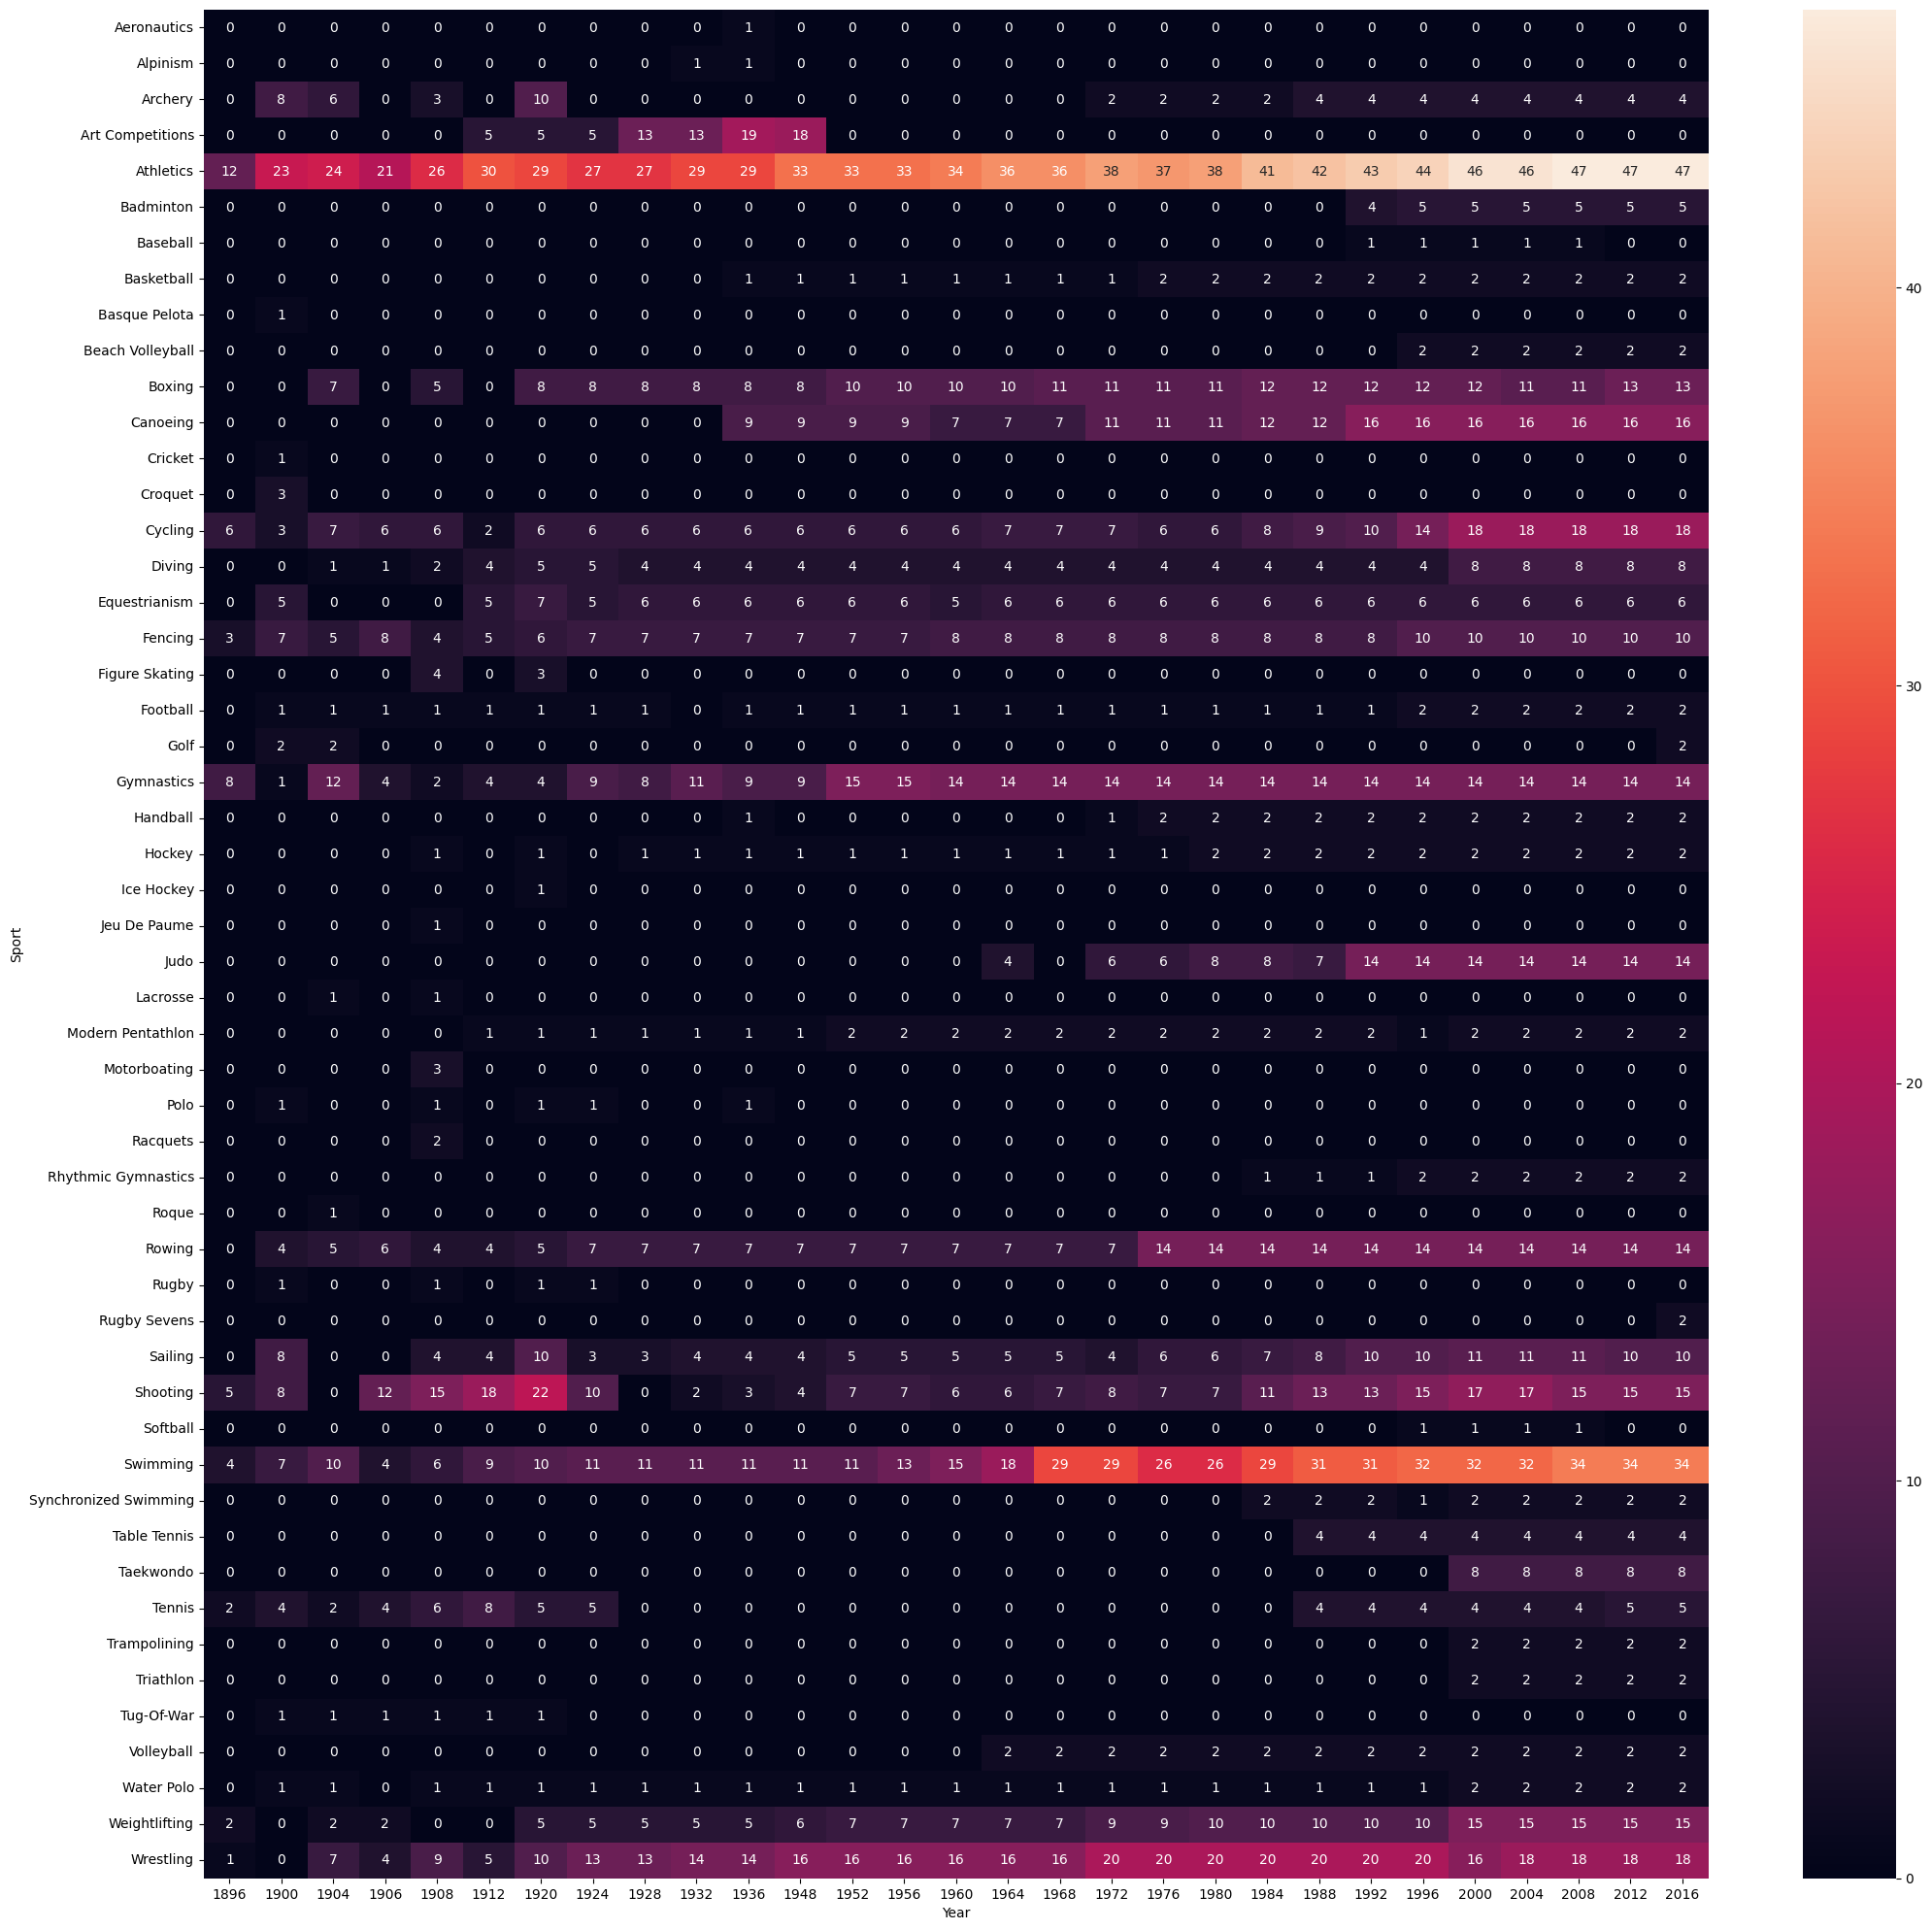

In [52]:
# Sport-wise events over years
x = df.drop_duplicates(subset=["Year", "Event", "Sport"])

plt.figure(figsize=(25,25))
sns.heatmap((x.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count").fillna(0).astype(int)), annot=True);

In [53]:
# Dataframe of most successful athletles in olympics
y = df.dropna(subset=["Medal"], axis=0)["Name"].value_counts().to_frame().reset_index()
y.merge(df.drop_duplicates("Name"), on="Name", how="left")[["Name","count","Sport","region"]]

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
4,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
24540,Ren Abadie,1,Cycling,France
24541,Giovanni Abagnale,1,Rowing,Italy
24542,Jos Luis Abajo Gmez,1,Fencing,Spain
24543,Patimat Abakarova,1,Taekwondo,Azerbaijan


In [54]:
def most_successfull_athlete(df, sport="Overall"):
    temp_df = df.dropna(subset=["Medal"], axis=0)

    if sport != "Overall":
        temp_df = temp_df[temp_df["Sport"] == sport]

    temp_df = temp_df["Name"].value_counts().to_frame().reset_index()
    # temp_df = temp_df.merge(df.drop_duplicates("Name"), on="Name", how="left")[["Name","count","Sport","region"]]
    # temp_df.rename(columns={"count": "Medal Count"}, inplace=True)
    
    return temp_df

In [55]:
(most_successfull_athlete(df, "Overall")).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24545 entries, 0 to 24544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    24545 non-null  object
 1   count   24545 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 383.6+ KB


### Country-wise Analysis
1. country-wise medal tally per year(line plot)
2. country performance on heatmap
3. most successful athletes top 10 

In [56]:
temp_df = df.dropna(subset=["Medal"])
temp_df = temp_df.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])
df_new_1 = temp_df.groupby(["region", "Year"])["Medal"].count().to_frame().reset_index()

In [57]:
df_new_1

,region,Year,Medal
0,Afghanistan,2008,1
1,Afghanistan,2012,1
2,Algeria,1984,2
3,Algeria,1992,2
4,Algeria,1996,3
...,...,...,...
1259,Zambia,1984,1
1260,Zambia,1996,1
1261,Zimbabwe,1980,1
1262,Zimbabwe,2004,3


In [58]:
fig = px.line(
    data_frame = df_new_1[df_new_1["region"] == "USA"],
    x = "Year",
    y = "Medal",
    title = "USA Olympics Medal count"
)
fig.update_layout(xaxis_title="Year", yaxis_title="Count")
fig.show()

Text(0.5, 1.0, 'Focused Sports of USA')

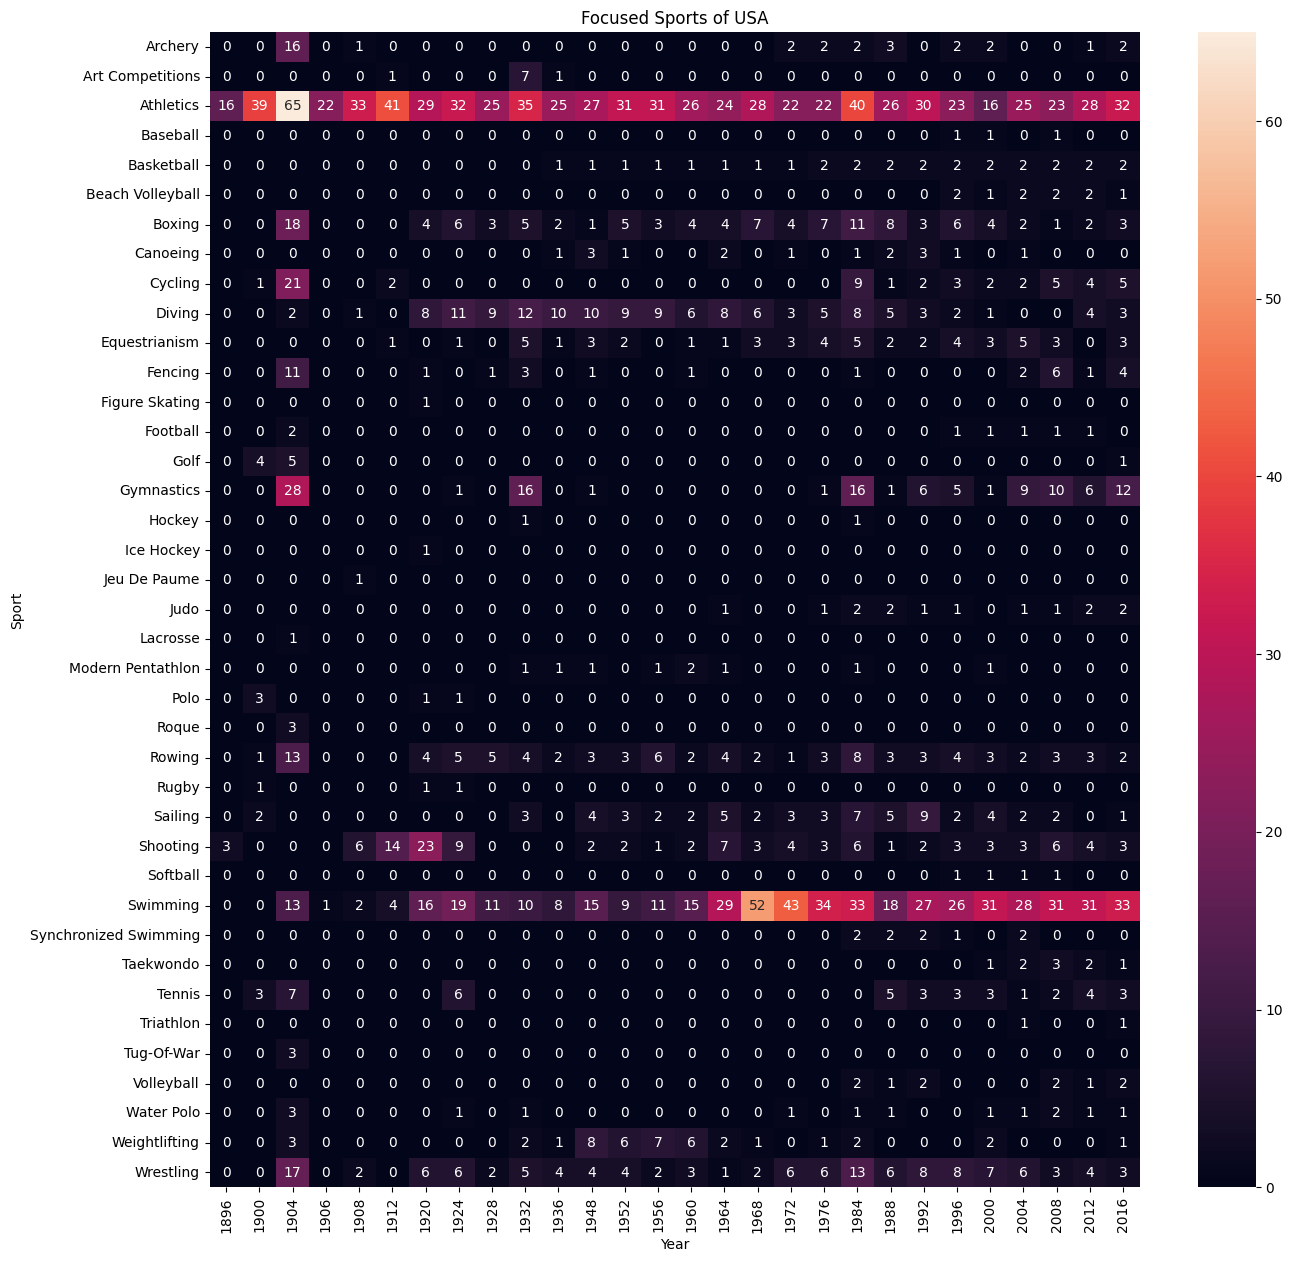

In [59]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(temp_df[temp_df["region"] == "USA"].pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0), annot=True, ax=ax)
ax.set_title("Focused Sports of USA")

In [60]:
def most_successfull_athlete(df, country):
    temp_df = df.dropna(subset=["Medal"], axis=0)
    temp_df = temp_df[temp_df["region"] == country]
    temp_df = temp_df["Name"].value_counts().to_frame().reset_index()
    # temp_df = temp_df.merge(df.drop_duplicates("Name"), on="Name", how="left")[["Name","count","Sport","region"]]
    # temp_df.rename(columns={"count": "Medal Count"}, inplace=True)
    
    return temp_df

In [61]:
most_successfull_athlete(df, "USA")

,Name,count
0,"Michael Fred Phelps, II",28
1,Ryan Steven Lochte,12
2,Natalie Anne Coughlin (-Hall),12
3,"Dara Grace Torres (-Hoffman, -Minas)",12
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
...,...,...
3360,Derrick Ralph Adkins,1
3361,"Thomas Francis ""Tom"" Cronan",1
3362,Andre Kirk Agassi,1
3363,Robyn Mokihana Ah Mow-Santos,1


### Athlete-wise Analysis
1. Medalist Age distribution
2. Gold Medalist Age distribution by Sport

In [62]:
import plotly.figure_factory as ff

In [63]:
athlete_df = df.drop_duplicates(subset=["Name", "region", "Year", "Sport", "Event", "City"])

In [64]:
x1 = athlete_df["Age"].dropna()
x2 = athlete_df[athlete_df["Medal"] == "Gold"]["Age"].dropna()
x3 = athlete_df[athlete_df["Medal"] == "Silver"]["Age"].dropna()
x4 = athlete_df[athlete_df["Medal"] == "Bronze"]["Age"].dropna()

In [65]:
print(type(x1), type(x2), type(x3), type(x4))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [66]:
fig = ff.create_distplot([x1,x2,x3,x4], ["Overall Age", "Gold Medalist", "Silver Medalist", "Bronze Medalist"], show_hist=False, show_rug=False)
fig.show()

In [67]:
famous_sports = athlete_df["Sport"].value_counts().to_frame().reset_index().head(20)["Sport"].to_list()

In [68]:
y2 = []
labels = []

for sport in famous_sports:
    ages = athlete_df[(athlete_df["Medal"] == "Gold") & (athlete_df["Sport"] == sport)]["Age"].dropna()
    if len(ages) > 1 and ages.nunique() > 1:   # need ≥2 unique values
        y2.append(ages.tolist())
        labels.append(sport)

fig = ff.create_distplot(y2, labels, show_hist=False, show_rug=False)
fig.show()



In [69]:

   
athlete_df = df.drop_duplicates(subset=["Name", "region", "Year", "Sport", "Event", "City"])
famous_sports = athlete_df["Sport"].value_counts().to_frame().reset_index().head(20)["Sport"].to_list()

y2 = []
labels = []

for sport in famous_sports:
    ages = athlete_df[(athlete_df["Medal"] == "Gold") & (athlete_df["Sport"] == sport)]["Age"].dropna()
    if len(ages) > 1 and ages.nunique() > 1:   # need ≥2 unique values
        y2.append(ages.tolist())
        labels.append(sport)

print(y2,labels)
y2[0]
   

[[26.0, 22.0, 19.0, 24.0, 27.0, 23.0, 27.0, 26.0, 22.0, 23.0, 25.0, 24.0, 22.0, 22.0, 25.0, 22.0, 28.0, 32.0, 22.0, 25.0, 22.0, 25.0, 31.0, 24.0, 21.0, 24.0, 30.0, 26.0, 29.0, 27.0, 27.0, 31.0, 35.0, 26.0, 22.0, 27.0, 22.0, 28.0, 24.0, 24.0, 19.0, 24.0, 21.0, 22.0, 22.0, 23.0, 31.0, 17.0, 23.0, 28.0, 28.0, 20.0, 24.0, 21.0, 24.0, 25.0, 23.0, 27.0, 33.0, 22.0, 22.0, 17.0, 30.0, 25.0, 21.0, 33.0, 27.0, 26.0, 23.0, 24.0, 24.0, 22.0, 24.0, 24.0, 37.0, 22.0, 26.0, 26.0, 26.0, 17.0, 29.0, 29.0, 27.0, 26.0, 20.0, 21.0, 27.0, 22.0, 20.0, 24.0, 24.0, 24.0, 28.0, 32.0, 20.0, 21.0, 21.0, 22.0, 26.0, 21.0, 30.0, 30.0, 30.0, 30.0, 20.0, 22.0, 24.0, 30.0, 21.0, 21.0, 25.0, 25.0, 25.0, 29.0, 29.0, 29.0, 32.0, 28.0, 24.0, 30.0, 22.0, 21.0, 29.0, 23.0, 22.0, 22.0, 21.0, 24.0, 27.0, 21.0, 25.0, 25.0, 29.0, 29.0, 28.0, 22.0, 18.0, 26.0, 24.0, 24.0, 24.0, 31.0, 23.0, 27.0, 22.0, 33.0, 21.0, 22.0, 23.0, 28.0, 27.0, 22.0, 26.0, 25.0, 25.0, 29.0, 24.0, 28.0, 25.0, 23.0, 21.0, 21.0, 25.0, 25.0, 20.0, 29.0, 23

[26.0,
 22.0,
 19.0,
 24.0,
 27.0,
 23.0,
 27.0,
 26.0,
 22.0,
 23.0,
 25.0,
 24.0,
 22.0,
 22.0,
 25.0,
 22.0,
 28.0,
 32.0,
 22.0,
 25.0,
 22.0,
 25.0,
 31.0,
 24.0,
 21.0,
 24.0,
 30.0,
 26.0,
 29.0,
 27.0,
 27.0,
 31.0,
 35.0,
 26.0,
 22.0,
 27.0,
 22.0,
 28.0,
 24.0,
 24.0,
 19.0,
 24.0,
 21.0,
 22.0,
 22.0,
 23.0,
 31.0,
 17.0,
 23.0,
 28.0,
 28.0,
 20.0,
 24.0,
 21.0,
 24.0,
 25.0,
 23.0,
 27.0,
 33.0,
 22.0,
 22.0,
 17.0,
 30.0,
 25.0,
 21.0,
 33.0,
 27.0,
 26.0,
 23.0,
 24.0,
 24.0,
 22.0,
 24.0,
 24.0,
 37.0,
 22.0,
 26.0,
 26.0,
 26.0,
 17.0,
 29.0,
 29.0,
 27.0,
 26.0,
 20.0,
 21.0,
 27.0,
 22.0,
 20.0,
 24.0,
 24.0,
 24.0,
 28.0,
 32.0,
 20.0,
 21.0,
 21.0,
 22.0,
 26.0,
 21.0,
 30.0,
 30.0,
 30.0,
 30.0,
 20.0,
 22.0,
 24.0,
 30.0,
 21.0,
 21.0,
 25.0,
 25.0,
 25.0,
 29.0,
 29.0,
 29.0,
 32.0,
 28.0,
 24.0,
 30.0,
 22.0,
 21.0,
 29.0,
 23.0,
 22.0,
 22.0,
 21.0,
 24.0,
 27.0,
 21.0,
 25.0,
 25.0,
 29.0,
 29.0,
 28.0,
 22.0,
 18.0,
 26.0,
 24.0,
 24.0,
 24.0,
 31.0,
 23.0,

In [70]:
athlete_df["Medal"].fillna("No Medal", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15700\1041261191.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Text(0.5, 1.0, 'Female')

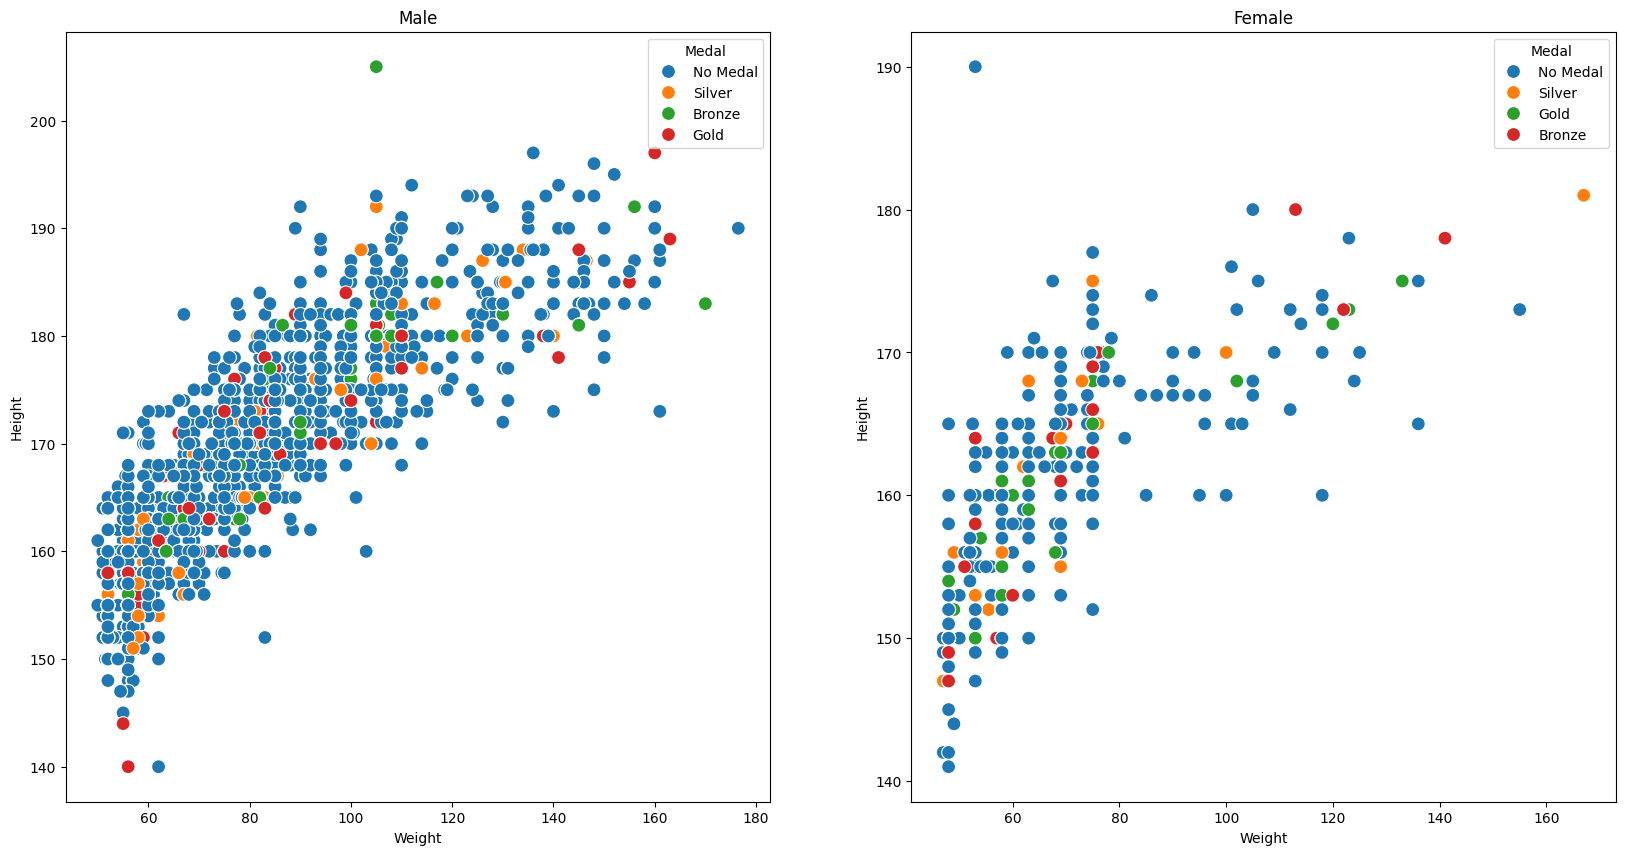

In [71]:
temp_df = athlete_df[athlete_df["Sport"] == "Weightlifting"]
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(data=temp_df[temp_df["Sex"]=="M"], x="Weight", y="Height", hue="Medal", s=100, ax=ax[0])
sns.scatterplot(data=temp_df[temp_df["Sex"]=="F"], x="Weight", y="Height", hue="Medal",markers="*", s=100, ax=ax[1])
ax[0].set_title("Male")
ax[1].set_title("Female")

In [72]:
men = athlete_df[athlete_df["Sex"] == "M"].groupby("Year").count()["Name"].reset_index().rename(columns={"Name": "Male"})
women = athlete_df[athlete_df["Sex"] == "F"].groupby("Year").count()["Name"].reset_index().rename(columns={"Name": "Female"})

In [73]:
final = men.merge(women, on="Year", how="left")
final.fillna(0, inplace=True)

In [74]:
fig = px.line(
    data_frame=final,
    x="Year",
    y=["Male","Female"],
    title="Participation Count"
    )

fig.show()